# Visualization of Worst-Case Scenarios from Directed Scenario Search

In [1]:
import seaborn as sns
import os
from model.enumerations import ProblemFormulation
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
from dmdu.scenarioselection.search.directed_scenario_search import load_scenario_search_results
from dmdu.general.xlm_constants_epsilons import get_uncertainty_names

In [2]:
path = os.path.join(
    os.getcwd(),
    'data'
)

problem_formulations = ProblemFormulation.get_8_problem_formulations()

scenarios = load_scenario_search_results(
    data_folder_path=path,
    searchover='uncertainties',
    nfe=200000,
    problem_formulations=problem_formulations,
    n_references=1,
    n_seeds=1
)

# To change the order of the columns
x_names = get_uncertainty_names()
scenarios = scenarios.reindex(columns=x_names)

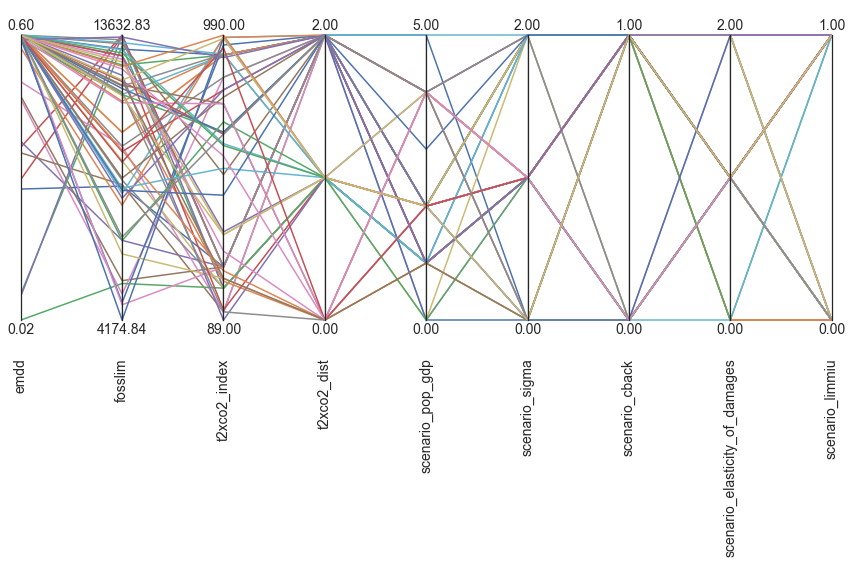

In [5]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 8)})

limits = parcoords.get_limits(scenarios)
axes = parcoords.ParallelAxes(limits)
axes.plot(scenarios)
plt.show()


In [6]:
path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'outputimages',
    'scenariodiscovery',
    'dss_worst_scenarios_pap.png'
)
axes.fig.savefig(path, dpi=200, pad_inches=0.2, bbox_inches='tight')